In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("/content/titanic-passengers.csv",delimiter=";")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [200]:

print(df.head())
print(df["Fare"].describe())
print(df["Age"].describe())
print(df["Cabin"].describe())
print(df["Embarked"].describe())
print(df["Ticket"].describe())
print("number of null passenger id ",df["PassengerId"].isnull().sum())
print("number of null Survived ",df["Survived"].isnull().sum())
print("number of null Pclass ",df["Pclass"].isnull().sum())
print("number of null Sex ",df["Sex"].isnull().sum())
print("number of null Age ",df["Age"].isnull().sum())
print("number of null SibSp ",df["SibSp"].isnull().sum())
print("number of null Parch ",df["Parch"].isnull().sum())
print("number of null Ticket ",df["Ticket"].isnull().sum())
print("number of null Fare ",df["Fare"].isnull().sum())
print("number of null Cabin ",df["Cabin"].isnull().sum())
print("number of null Embarked ",df["Embarked"].isnull().sum())




   PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0          343       No       2  ...  13.0000    NaN         S
1           76       No       3  ...   7.6500  F G73         S
2          641       No       3  ...   7.8542    NaN         S
3          568       No       3  ...  21.0750    NaN         S
4          672       No       1  ...  52.0000    B71         S

[5 rows x 12 columns]
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
count          891
unique         681
top       CA. 2343


In [201]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Embarked"].fillna("S",inplace=True)
print(df["Embarked"].describe())


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [202]:
df["Cabin"].fillna("B96 B98",inplace=True)
df["Cabin"].isnull().sum()

0

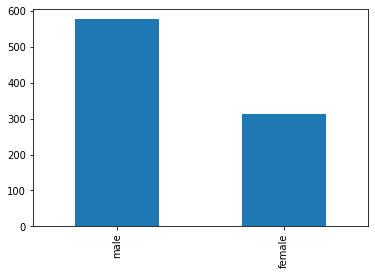

In [203]:
vc1=df['Sex'].value_counts()
vc1.plot.bar()

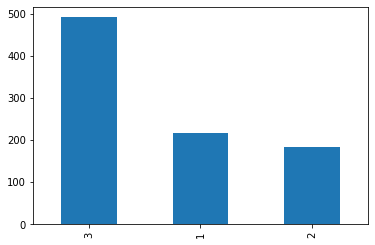

In [204]:
vc2=df['Pclass'].value_counts()
vc2.plot.bar()

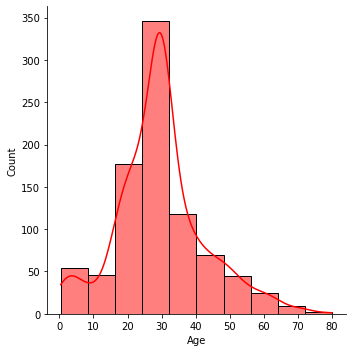

In [205]:

sns.displot(df["Age"],bins=10,kde=True,color="red")

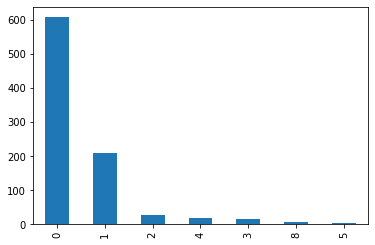

In [206]:
vc3=df['SibSp'].value_counts()
vc3.plot.bar()

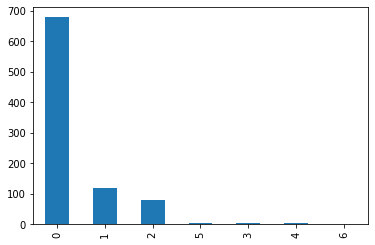

In [207]:
vc4=df['Parch'].value_counts()
vc4.plot.bar()

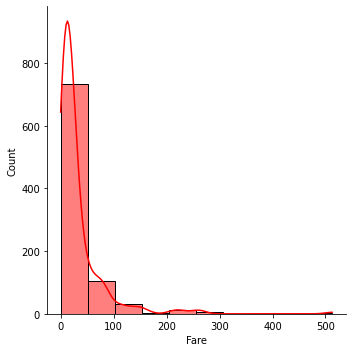

In [208]:
sns.displot(df["Fare"],bins=10,kde=True,color="red")

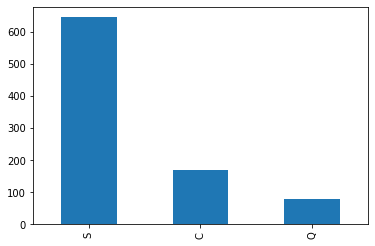

In [209]:
vc5=df['Embarked'].value_counts()
vc5.plot.bar()


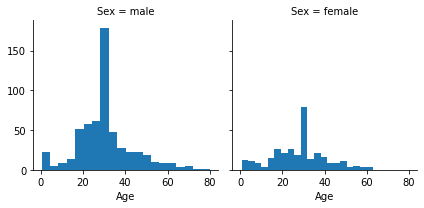

In [210]:
g=sns.FacetGrid(df,col="Sex")
g.map(plt.hist,"Age",bins=20)

In [211]:
cleanup_s = {"Sex":{"male" : 0 , "female":1}}
df.replace(cleanup_s,inplace=True)
cleanup_survived = {"Survived":{"No" : 0 , "Yes":1}}
df.replace(cleanup_survived,inplace=True)
encoder=LabelEncoder()
df["Embarked"]=encoder.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,B96 B98,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,2
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,B96 B98,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,B96 B98,2
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,B96 B98,0
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,B96 B98,0
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,B96 B98,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,B96 B98,2


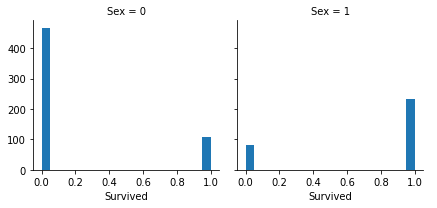

In [212]:
encoder=LabelEncoder()
df["Survived"]=encoder.fit_transform(df['Survived'])
grid=sns.FacetGrid(df,col="Sex")
grid.map(plt.hist,"Survived",bins=20)
grid.add_legend()

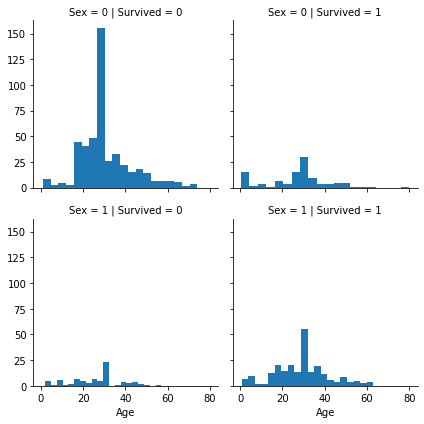

In [213]:
grid=sns.FacetGrid(df,col="Survived",row="Sex")
grid.map(plt.hist,"Age",bins=20)

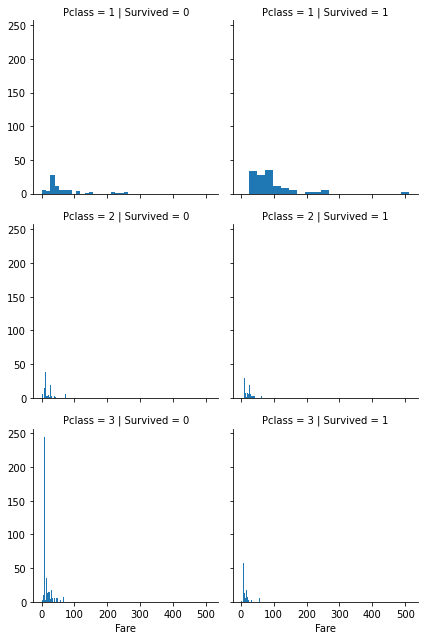

In [214]:
grid=sns.FacetGrid(df,col="Survived",row="Pclass")
grid.map(plt.hist,"Fare",bins=20)

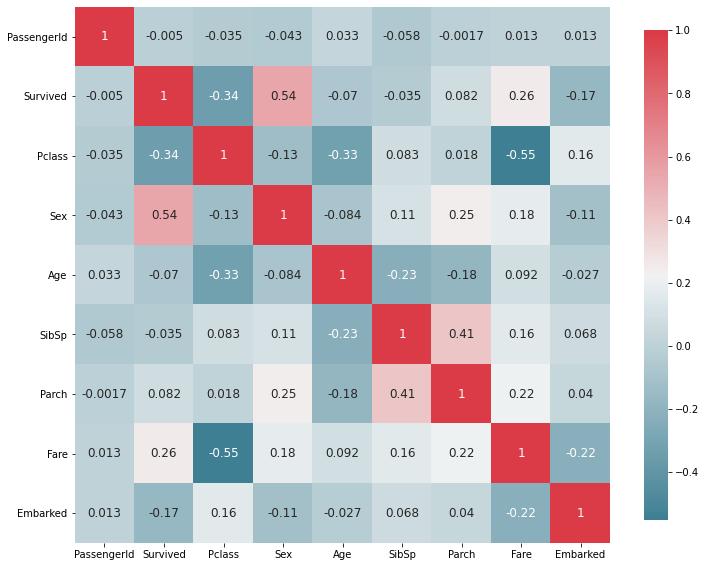

In [215]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

This function display the correlation ratio between all the features allowing us to see which ones are related and which ones are important to the survival of a person

In [216]:
pcls_m=df.groupby(["Pclass"]).mean()["Survived"]
pcls_m

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [217]:
df1=df.drop("Name",axis=1)
df1=df1.drop("Ticket",axis=1)
df1=df1.drop("Cabin",axis=1)

In [218]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [219]:

test=df["Name"]

li=[]
for index, value in test.items():
  li.append(Title_Dictionary[test[index].split(', ')[1].split('.')[0]])
print(li)

['Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Officer', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Officer', 'Mrs', 'Royalty', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Mrs', 'Master', 'Officer', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Master', 'Miss', 'Mrs', 'Officer', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Miss', 'Miss', 'Mrs', 'Master', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Master', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Master', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Officer', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 

In [220]:
len(li)

891

In [221]:
titles=pd.Series(li)
df1["Titles"]=titles
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,343,0,2,0,28.000000,0,0,13.0000,2,Mrs
1,76,0,3,0,25.000000,0,0,7.6500,2,Mrs
2,641,0,3,0,20.000000,0,0,7.8542,2,Mrs
3,568,0,3,1,29.000000,0,4,21.0750,2,Mrs
4,672,0,1,0,31.000000,1,0,52.0000,2,Mrs
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,1,14.000000,1,0,30.0708,0,Mrs
887,61,0,3,0,22.000000,0,0,7.2292,0,Mrs
888,535,0,3,1,30.000000,0,0,8.6625,2,Miss
889,102,0,3,0,29.699118,0,0,7.8958,2,Mrs


In [222]:
cleanup_t = {"Titles":{"Officer" : 0 , "Royalty":1, "Miss" : 2 , "Mrs" : 3 , "Master" : 4}}
df1.replace(cleanup_t,inplace=True)
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,343,0,2,0,28.000000,0,0,13.0000,2,3
1,76,0,3,0,25.000000,0,0,7.6500,2,3
2,641,0,3,0,20.000000,0,0,7.8542,2,3
3,568,0,3,1,29.000000,0,4,21.0750,2,3
4,672,0,1,0,31.000000,1,0,52.0000,2,3
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,1,14.000000,1,0,30.0708,0,3
887,61,0,3,0,22.000000,0,0,7.2292,0,3
888,535,0,3,1,30.000000,0,0,8.6625,2,2
889,102,0,3,0,29.699118,0,0,7.8958,2,3


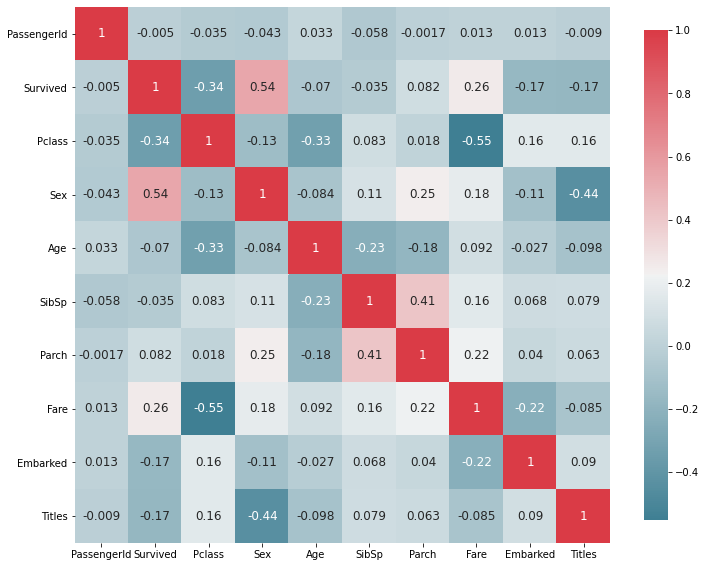

In [223]:
plot_correlation_map(df1)

In [225]:
df1["FamilySize"]=df1['SibSp']+df1['Parch']
df1=df1.drop(["Parch","SibSp"],axis=1)
df1

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Titles,FamilySize
0,343,0,2,0,28.000000,13.0000,2,3,0
1,76,0,3,0,25.000000,7.6500,2,3,0
2,641,0,3,0,20.000000,7.8542,2,3,0
3,568,0,3,1,29.000000,21.0750,2,3,4
4,672,0,1,0,31.000000,52.0000,2,3,1
...,...,...,...,...,...,...,...,...,...
886,10,1,2,1,14.000000,30.0708,0,3,1
887,61,0,3,0,22.000000,7.2292,0,3,0
888,535,0,3,1,30.000000,8.6625,2,2,0
889,102,0,3,0,29.699118,7.8958,2,3,0


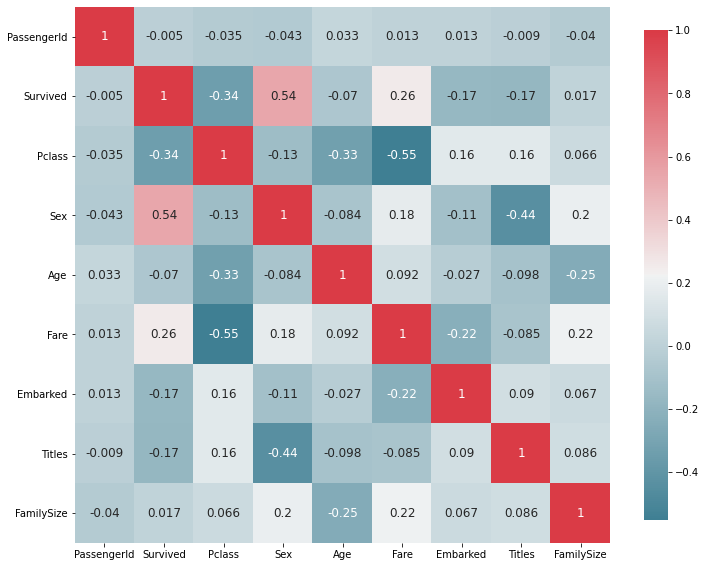

In [229]:
plot_correlation_map(df1)

The correlation index between familysize and survival rate is 0.017 which is really low and means that this feature will not add valuable information to the analysys